In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
years = [f"{x:04d}" for x in range(0,1955)]
ii =0
result = np.zeros(1955)

for yy in years:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/air500/TAUX/CESM_TAU_'+yy+'_.nc')
    TAUX1 = data1.variables['TAUX'][0,80:280,-220:]
    TAUX2 = data1.variables['TAUX'][0,80:280,:160]
    TAUX = np.hstack((TAUX1,TAUX2))
    lont1 = data1.variables['lon'][-220:]
    lont2 = data1.variables['lon'][:160]
    lont = np.hstack((lont1,lont2))
    latt = data1.variables['lat'][80:280]
    ###### TAUX
    TAUX[TAUX>0]=np.nan
    med = np.nanmean(TAUX)
    #result[ii] = np.max(TAUX)
    #A = np.max(med)
    #B = np.where(med == A)[0][:]
    result[ii] = med
    ii = ii + 1
    np.savetxt('TAUXplace1.out',result)

In [3]:
years = [f"{x:04d}" for x in range(0,3719)]
ii =0
result = np.zeros(3719)

for yy in years:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/air500/TAUX300/CESM_TAU_'+yy+'_.nc')
    TAUX1 = data1.variables['TAUX'][0,80:160,-220:]
    TAUX2 = data1.variables['TAUX'][0,80:160,:160]
    TAUX = np.hstack((TAUX1,TAUX2))
    lont1 = data1.variables['lon'][-220:]
    lont2 = data1.variables['lon'][:160]
    lont = np.hstack((lont1,lont2))
    latt = data1.variables['lat'][80:160]
    ###### TAUX
    TAUX[TAUX>0]=np.nan
    med = np.nanmean(TAUX)
    #A = np.max(med)
    #B = np.where(med == A)[0][:]
    result[ii] = med
    ii = ii + 1
    np.savetxt('TAUXplace300.out',result)

In [4]:
data1 = np.loadtxt("TAUXplace1.out")
data2 = np.loadtxt("TAUXplace300.out")

In [5]:
mid = np.zeros((120))
mid[mid == 0]=np.nan
dd = np.hstack((data2,mid))
ddd = np.hstack((dd,data1))

In [6]:
ww2 = np.convolve(ddd, np.ones((60,))/60, mode='valid')

In [7]:
mean = np.nanmean(ww2)
#fin = ww2 -mean

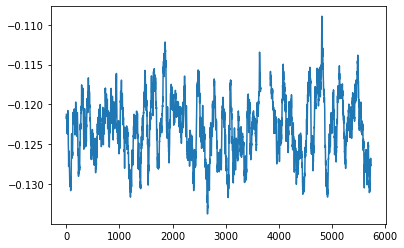

In [8]:
plt.plot(ww2)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


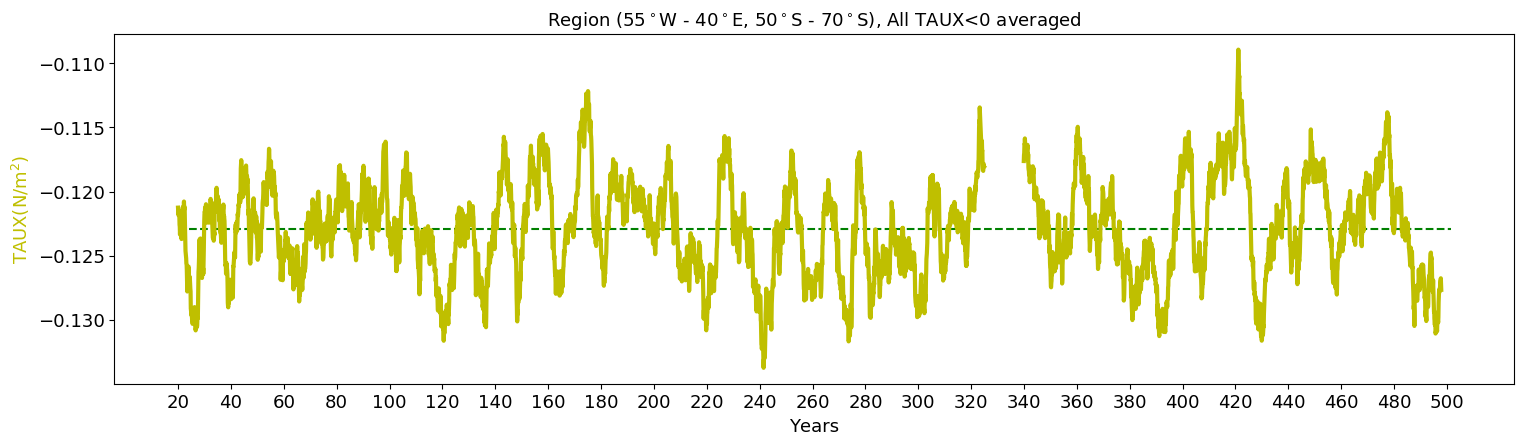

In [9]:
#t = np.arange(0,3720,12)
my_font = {'fontname':'Cambria', 'size':'13'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.7, 0.7])
ax0.plot(ww2,'y',linewidth=3)
plt.hlines(mean, 0, 5777, colors = "g",linestyles = "dashed")
plt.xticks(range(0,5777,240), ['20', '40', '60', '80','100','120','140','160','180','200','220', '240', '260','280','300','320','340', '360', '380','400','420','440','460','480','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('TAUX(N/m$^2$)',color= 'y',**my_font)
plt.axis("tight")
ax0.set_title('Region (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S), All TAUX<0 averaged',**my_font)
plt.savefig("Tmaxloc.png",bbox_inches='tight',dpi=fig.dpi)

In [10]:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/air500/TAUX/CESM_TAU_0001_.nc')
    TAUX1 = data1.variables['TAUX'][0,80:160,-220:]
    TAUX2 = data1.variables['TAUX'][0,80:160,:160]
    TAUX = np.hstack((TAUX1,TAUX2))
    lont1 = data1.variables['lon'][-220:]
    lont2 = data1.variables['lon'][:160]
    lont = np.hstack((lont1,lont2))
    latt = data1.variables['lat'][80:160]
    ###### TAUX
    A = np.max(TAUX)
    B = np.where(TAUX == A)[0][:]
    latt[B]

masked_array(data=[-68.],
             mask=False,
       fill_value=1e+20)

In [11]:
med = np.nanmean(TAUX,axis=1)